In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import seaborn as sns

from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


In [2]:
deg_to_rad = 2. * np.pi / 360.

# My mean PMs within rh

In [3]:
df_kw = pd.read_csv('dwarf-csvs/dwarfs_detail.csv').drop(columns=['Unnamed: 0'])
df_kw = df_kw.drop(columns=['Nbg_per_deg2', 'Nstar_per_rhdeg3'])
df_kw.sample(2)

,GalaxyName,RA_deg,Dec_deg,Distance_pc,rh(arcmins),Nstar_rh,pmra_rh,pmdec_rh,Nstar_2rh,pmra_2rh,pmdec_2rh,rh_deg
33,LeoV,172.790000,2.22,177827.941004,2.6,14,-1.367983,-4.746397,57,-5.628163,-4.445216,0.043333
34,Pegasus3,336.094167,5.42,205116.217883,1.3,7,9.235669,2.275212,27,2.382329,-4.597581,0.021667


In [4]:
df_kw['dec_rad'] = df_kw['Dec_deg'] * deg_to_rad
df_kw['pmra_rh*cos(dec)'] = df_kw['pmra_rh'] * np.cos(df_kw['dec_rad'])
df_kw['pmra_2rh*cos(dec)'] = df_kw['pmra_2rh'] * np.cos(df_kw['dec_rad'])
df_kw.sample(2)

,GalaxyName,RA_deg,Dec_deg,Distance_pc,rh(arcmins),Nstar_rh,pmra_rh,pmdec_rh,Nstar_2rh,pmra_2rh,pmdec_2rh,rh_deg,dec_rad,pmra_rh*cos(dec),pmra_2rh*cos(dec)
40,ReticulumIII,56.36000,-60.450000,91622.049012,2.40,11,4.289628,3.952851,42,5.814544,-3.268421,0.040000,-1.055052,2.115571,2.867634
24,HorologiumII,49.13375,-50.018056,77983.011052,2.09,12,3.386036,-5.078660,32,5.791953,-2.563371,0.034833,-0.872980,2.175684,3.721597


# PMs from Table 3 in Pace et al 2019
Table data was downloaded from arxiv with source

In [5]:
t = Table.read('pm-data/Pace2019_table_PM.tex')
for col in t.colnames:
    print(col)

\colhead{Satellite}
\colhead{$\sum p_i$}
\colhead{${\rm N}$($p_i > 0.1$)}
\colhead{${\rm N}_{\rm expected}$}
\colhead{${\rm N}(r<3\times r_h)$}
\colhead{$\overline{\mu_{\alpha }\cos{\delta}}$}
\colhead{$\overline{\mu_{\delta}}$ }
\colhead{$C_{\overline{\pmra} \times \overline{\pmdec}}$ }


In [6]:
newcol = ['satellite', 
          'prob_membership',
          'Nstar_(prob>0.1)',
          'Nexpected',
          'N(r<3rh)',
          'pmra*cos(dec)',
          'pmdec',
          'correlation',
         ]

for i,col in enumerate(t.colnames):
    print('%20s    <-    %s' % (newcol[i], col))

           satellite    <-    \colhead{Satellite}
     prob_membership    <-    \colhead{$\sum p_i$}
    Nstar_(prob>0.1)    <-    \colhead{${\rm N}$($p_i > 0.1$)}
           Nexpected    <-    \colhead{${\rm N}_{\rm expected}$}
            N(r<3rh)    <-    \colhead{${\rm N}(r<3\times r_h)$}
       pmra*cos(dec)    <-    \colhead{$\overline{\mu_{\alpha }\cos{\delta}}$}
               pmdec    <-    \colhead{$\overline{\mu_{\delta}}$ }
         correlation    <-    \colhead{$C_{\overline{\pmra} \times \overline{\pmdec}}$ }


In [7]:
df_pace = t.to_pandas()
df_pace = df_pace.rename(columns={col: newcol[i] for i,col in enumerate(t.colnames)})
df_pace.sample(2)

,satellite,prob_membership,Nstar_(prob>0.1),Nexpected,N(r<3rh),pmra*cos(dec),pmdec,correlation
2,Horologium I,17.06,20,$16 \pm 4$,15,$0.95_{-0.07}^{+0.07}$,$-0.55_{-0.06}^{+0.06}$,0.29
1,Grus I,8.23,9,$8 \pm 3$,8,$-0.25_{-0.16}^{+0.16}$,$-0.47_{-0.23}^{+0.23}$,0.35


In [8]:
df_pace['mean_pmra*cos(dec)'] = df_pace['pmra*cos(dec)'].str.split('_', n=1, expand=True)[0]
df_pace['mean_pmra*cos(dec)'] = df_pace['mean_pmra*cos(dec)'].str.replace('$', '').astype(float)

df_pace['mean_pmdec'] = df_pace['pmdec'].str.split('_', n=1, expand=True)[0]
df_pace['mean_pmdec'] = df_pace['mean_pmdec'].str.replace('$', '').astype(float)

df_pace.sample(2)

,satellite,prob_membership,Nstar_(prob>0.1),Nexpected,N(r<3rh),pmra*cos(dec),pmdec,correlation,mean_pmra*cos(dec),mean_pmdec
9,Phoenix II,8.78,10,$9 \pm 3$,9,$0.49_{-0.10}^{+0.11}$,$-1.03_{-0.12}^{+0.12}$,-0.48,0.49,-1.03
6,Columba I,7.19,11,$6 \pm 3$,8,$-0.02_{-0.27}^{+0.24}$,$-0.04_{-0.30}^{+0.30}$,-0.22,-0.02,-0.04


# Comparison

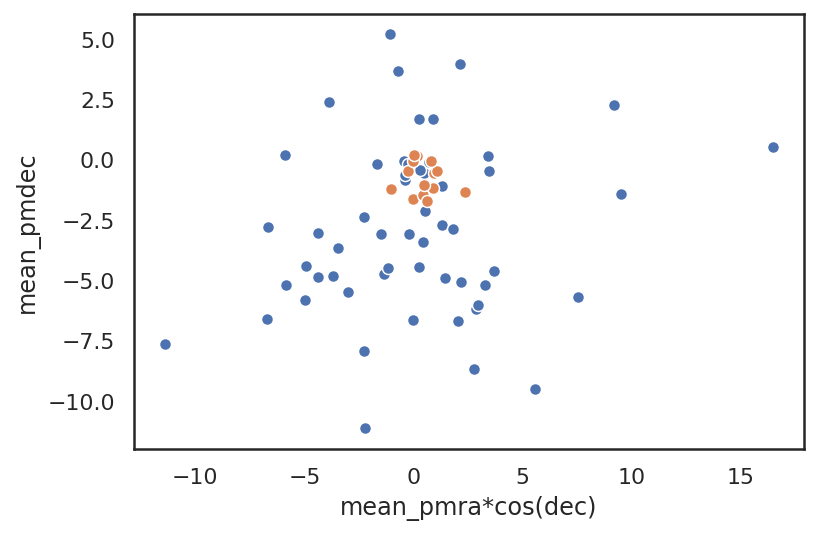

In [9]:
sns.set(style="white", color_codes=True, font_scale=1)
fig, ax = plt.subplots()

sns.scatterplot(x=df_kw['pmra_rh*cos(dec)'], y=df_kw['pmdec_rh'], ax=ax)
sns.scatterplot(x=df_pace['mean_pmra*cos(dec)'], y=df_pace['mean_pmdec'], ax=ax)
# sns.scatterplot(x=df['GalaxyName'], y=df['overlap_s2_min'], ax=ax, color='b', alpha=alpha)
# sns.scatterplot(x=df['GalaxyName'], y=df['overlap_s2_max'], ax=ax, color='b', alpha=alpha)
# ax.errorbar(df['GalaxyName'], df['overlap_s2_mean'], yerr=df['overlap_s2_std'], color='b', ls='none')
# ax.axhline(2, ls='--', color='b')


# fig.autofmt_xdate()
# ax.set_ylabel('significance')
# ax.set_title('significance in overlapping area')

# plt.savefig('sig_overlap.png', bbox_inches='tight', dpi=300)